In [1]:
!which pip

/home/devmiftahul/.pyenv/versions/3.10.5/envs/finrl/bin/pip


In [3]:
!pip install wrds

In [4]:
!pip show wrds

Name: wrds
Version: 3.2.0
Summary: Access WRDS data through PostgreSQL in Python.
Home-page: http://wrds-www.wharton.upenn.edu
Author: 
Author-email: Alex Malek <amalek@wharton.upenn.edu>, Tim Allen <tallen@wharton.upenn.edu>, Jeff VanSickle <vjef@wharton.upenn.edu>
License: BSD-3-Clause
Location: /home/devmiftahul/.pyenv/versions/3.10.5/envs/finrl/lib/python3.10/site-packages
Requires: numpy, packaging, pandas, psycopg2-binary, scipy, sqlalchemy
Required-by: finrl


In [5]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 86.5 MB/s eta 0:00:00


In [6]:
!pip show swig

Name: swig
Version: 4.2.1.post0
Summary: SWIG is a software development tool that connects programs written in C and C++ with a variety of high-level programming languages.
Home-page: https://swig.org/
Author: 
Author-email: 
License: https://github.com/swig/swig/blob/master/LICENSE
Location: /home/devmiftahul/.pyenv/versions/3.10.5/envs/finrl/lib/python3.10/site-packages
Requires: 
Required-by: 


In [8]:
!sudo apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig

[sudo] password for devmiftahul: 


In [13]:
!dpkg -l | grep libgl1-mesa-glx

ii  libgl1-mesa-glx:amd64             23.0.4-0ubuntu1~22.04.1                 amd64        transitional dummy package


In [14]:
!dpkg -l | grep cmake

ii  cmake                             3.22.1-1ubuntu1.22.04.2                 amd64        cross-platform, open-source make system
ii  cmake-data                        3.22.1-1ubuntu1.22.04.2                 all          CMake data files (modules, templates and documentation)


In [15]:
!dpkg -l | grep libopenmpi-dev

ii  libopenmpi-dev:amd64              4.1.2-2ubuntu1                          amd64        high performance message passing library -- header files


In [16]:
!dpkg -l | grep python3-dev

ii  libpython3-dev:amd64              3.10.6-1~22.04.1                        amd64        header files and a static library for Python (default)
ii  python3-dev                       3.10.6-1~22.04.1                        amd64        header files and a static library for Python (default)


In [17]:
!dpkg -l | grep swig

ii  swig                              4.0.2-1ubuntu1                          all          Generate scripting interfaces to C/C++ code
ii  swig4.0                           4.0.2-1ubuntu1                          amd64        Generate scripting interfaces to C/C++ code


In [ ]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

In [ ]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install stockstats
!pip install gym==0.21.0
!pip install stable-baselines3
!pip install tensorflow
!pip install pyfolio-reloaded

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

2024-11-22 09:00:27.744040: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 09:00:27.766469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732240827.790381  488981 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732240827.797735  488981 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 09:00:27.828841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [23]:
print(DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [24]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-03-01'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (97013, 8)


In [25]:
print(df.head())  # Display the first 5 rows
print(df.columns) # Display the column names

         date       open       high        low      close     volume   tic  \
0  2010-01-04   6.447412   7.643214   7.660714   7.622500  493729600  AAPL   
1  2010-01-04  40.591286  57.720001  57.869999  56.630001    5277400  AMGN   
2  2010-01-04  32.906174  40.919998  41.099998  40.810001    6894300   AXP   
3  2010-01-04  43.777550  56.180000  56.389999  55.720001    6186700    BA   
4  2010-01-04  39.883907  58.549999  59.189999  57.650002    7325600   CAT   

   day  
0    0  
1    0  
2    0  
3    0  
4    0  
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'day'], dtype='object')


In [27]:
 INDICATORS = ['macd',
               'rsi_30',
               'cci_30',
               'dx_30']

In [28]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [30]:
len(state), len(data)

NameError: name 'state' is not defined

In [31]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 175


In [32]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

# buy_cost_list = sell_cost_list = [0.001] * stock_dimension
# num_stock_shares = [0] * stock_dimension
# env_kwargs = {
#     "hmax": 100,
#     "initial_amount": 1000000,
#     "num_stock_shares": num_stock_shares,
#     "buy_cost_pct": buy_cost_list,
#     "sell_cost_pct": sell_cost_list,
#     "state_space": state_space,
#     "stock_dim": stock_dimension,
#     "tech_indicator_list": INDICATORS,
#     "action_space": stock_dimension,
#     "reward_scaling": 1e-4
# }

In [33]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)
# e_train_gym = StockTradingEnv(df = processed, **env_kwargs)
# agent = DRLAgent(e_train_gym)
# if_using_a2c = True
# model_a2c = agent.get_model("a2c")
# # if if_using_a2c:
# #   tmp_path = RESULTS_DIR + '/a2c'
# #   new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# #   model_a2c.set_logger(new_logger_a2c)
# trained_a2c = agent.train_model(model=model_a2c,
#                              tb_log_name='a2c',
#                              total_timesteps=50000)

In [35]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

SAC_model_kwargs = {
    "batch_size": 64,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

TD3_model_kwargs = {"batch_size": 100, "buffer_size": 1000000, "learning_rate": 0.0001}

timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000,
                 'sac' : 10_000,
                 'td3' : 10_000
                 }

In [36]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 SAC_model_kwargs,
                                                 TD3_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  176.92591537830393
======Model training from:  2010-01-01 to  2021-10-04
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_1
-------------------------------------
| time/                 |           |
|    fps                | 85        |
|    iterations         | 100       |
|    time_elapsed       | 5         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -41.3     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 29.9      |
|    reward             | 1.2269778 |
|    std                | 1         |
|    value_loss         | 1.24      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 89 

In [37]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe,SAC Sharpe,TD3 Sharpe
0,126,2021-10-04,2022-01-03,SAC,0.099119,0.26573,0.454325,0.529068,0.39597
1,189,2022-01-03,2022-04-04,SAC,-0.26565,-0.106396,-0.194695,-0.101781,-0.122089
2,252,2022-04-04,2022-07-06,TD3,-0.257445,-0.337893,-0.254936,-0.371037,-0.203801
3,315,2022-07-06,2022-10-04,SAC,-0.266201,-0.177751,-0.24313,-0.136036,-0.225583


In [38]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [40]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    # df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.4195594505576145


In [41]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,1.000000e+06,2022-01-03,NaN,2022-01-03
1,1.002308e+06,2022-01-04,0.002308,2022-01-04
2,1.001434e+06,2022-01-05,-0.000872,2022-01-05
3,9.875752e+05,2022-01-06,-0.013839,2022-01-06
4,9.829603e+05,2022-01-07,-0.004673,2022-01-07


<Axes: >

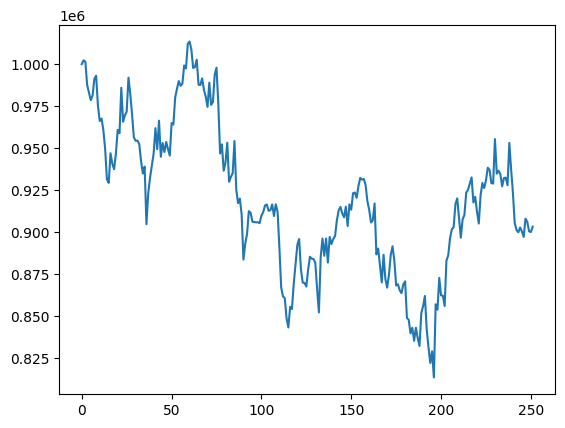

In [42]:
%matplotlib inline
df_account_value.account_value.plot()

In [43]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.096869
Cumulative returns    -0.096869
Annual volatility      0.197517
Sharpe ratio          -0.419559
Calmar ratio          -0.490095
Stability              0.341552
Max drawdown          -0.197654
Omega ratio            0.931666
Sortino ratio         -0.591627
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.904917
Daily value at risk   -0.025214
dtype: float64


In [47]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (251, 8)
Annual return         -0.088436
Cumulative returns    -0.088101
Annual volatility      0.185081
Sharpe ratio          -0.410029
Calmar ratio          -0.407645
Stability              0.243620
Max drawdown          -0.216945
Omega ratio            0.935511
Sortino ratio         -0.568133
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.966671
Daily value at risk   -0.023619
dtype: float64


In [48]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')

df_dji:             date           dji
0    2022-01-03  1.000000e+06
1    2022-01-04  1.008656e+06
2    2022-01-05  1.011041e+06
3    2022-01-06  1.002408e+06
4    2022-01-07  9.980177e+05
..          ...           ...
247  2022-12-27  9.147240e+05
248  2022-12-28  9.158399e+05
249  2022-12-29  9.091405e+05
250  2022-12-30  9.118987e+05
251  2023-01-03           NaN

[252 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.008656e+06
2022-01-05  1.011041e+06
2022-01-06  1.002408e+06
2022-01-07  9.980177e+05
...                  ...
2022-12-27  9.147240e+05
2022-12-28  9.158399e+05
2022-12-29  9.091405e+05
2022-12-30  9.118987e+05
2023-01-03           NaN

[252 rows x 1 columns]


df_result_ensemble.columns:  Index(['ensemble'], dtype='object')
df_trade_date:         datadate
0    2021-10-04
1    2021-10-05
2    2021-10-06
3    2021-10-07
4    2021-10-08
..          ...
348  2023-02-22
349  2023-02-23
350  2023-02-24
351  2023-02-27
352  2023-02-28

[353 rows x 1 columns]
df_result_ensemble:                  ensemble
date                    
2022-01-03  1.000000e+06
2022-01-04  1.002308e+06
2022-01-05  1.001434e+06
2022-01-06  9.875752e+05
2022-01-07  9.829603e+05
...                  ...
2022-12-27  9.078794e+05
2022-12-28  9.059836e+05
2022-12-29  9.003334e+05
2022-12-30  8.999030e+05
2023-01-03  9.031305e+05

[252 rows x 1 columns]
==============Compare to DJIA===========
result:                  ensemble           dji
date                                  
2022-01-03  1.000000e+06  1.000000e+06
2022-01-04  1.002308e+06  1.008656e+06
2022-01-05  1.001434e+06  1.011041e+06
2022-01-06  9.875752e+05  1.002408e+06
2022-01-07  9.829603e+05  9.980177e+05
...       

<Figure size 1500x500 with 0 Axes>

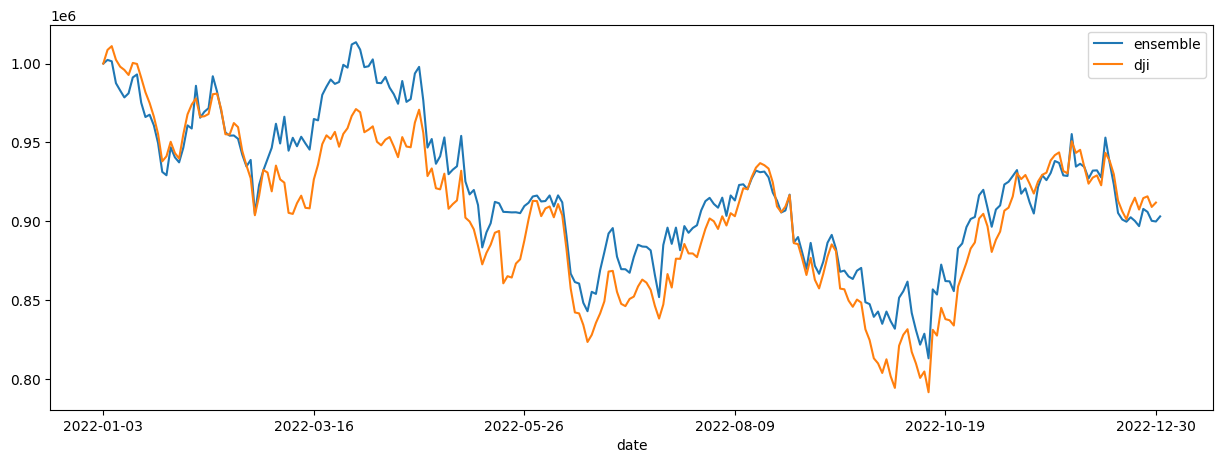

In [49]:
# print("==============Compare to DJIA===========")
# %matplotlib inline
# # S&P 500: ^GSPC
# # Dow Jones Index: ^DJI
# # NASDAQ 100: ^NDX
# backtest_plot(df_account_value,
#               baseline_ticker = '^DJI',
#               baseline_start = df_account_value.loc[0,'date'],
#               baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)

# df_result_ensemble.drop(df_result_ensemble.columns[0], axis = 1)
print("df_trade_date: ", df_trade_date)
# df_result_ensemble['date'] = df_trade_date['datadate']
# df_result_ensemble['account_value'] = df_account_value['account_value']
df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble: ", df_result_ensemble)
print("==============Compare to DJIA===========")
result = pd.DataFrame()
# result = pd.merge(result, df_result_ensemble, left_index=True, right_index=True)
# result = pd.merge(result, df_dji, left_index=True, right_index=True)
result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
print("result: ", result)
result.to_csv("result.csv")
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();